In [87]:
!pip install quimb -U
!pip install autoray
!pip install pydash

In [88]:
#################
#### IMPORTS ####
#################

# Arrays
import numpy as np
import cytoolz

# Deep Learning stuff
import torch
import torchvision
import torchvision.transforms as transforms

# Images display and plots
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl

# Fancy progress bars
import tqdm.notebook as tq

# Tensor Network Stuff
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn # Tensor Network library
import quimb

import collections
import opt_einsum as oe
import itertools
import copy

In [89]:
import TNutils
import importlib
importlib.reload(TNutils)
from TNutils import *

In [90]:
bars_mps = initialize_mps(4*4,2)
dataset = np.array(bars_n_stripes(30))
imgs = np.array([img.flatten() for img in dataset])
bar_data = np.array([tens_picture(img.flatten()) for img in dataset])
bar_cache = left_right_cache(bars_mps,bar_data)

In [91]:
lr = 0.5
nlls,_ = learning_epoch_cached(bars_mps, bar_data, 16, lr,bar_cache,lr_update = lambda x: x*0.95,batch_size = 30,max_bond = 16)

epoch 1/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 6.368795912813351 | Baseline: 3.4011973816621555
epoch 2/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 4.259250170530656 | Baseline: 3.4011973816621555
epoch 3/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.842583344961657 | Baseline: 3.4011973816621555
epoch 4/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.6980438960040196 | Baseline: 3.4011973816621555
epoch 5/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.6142787456725163 | Baseline: 3.4011973816621555
epoch 6/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.561442444250323 | Baseline: 3.4011973816621555
epoch 7/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.522790727580311 | Baseline: 3.4011973816621555
epoch 8/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.49069685823953 | Baseline: 3.4011973816621555
epoch 9/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.465420923219794 | Baseline: 3.4011973816621555
epoch 10/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4474157543530524 | Baseline: 3.4011973816621555
epoch 11/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.435030259405547 | Baseline: 3.4011973816621555
epoch 12/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4265015876108893 | Baseline: 3.4011973816621555
epoch 13/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4205521673211736 | Baseline: 3.4011973816621555
epoch 14/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4163195888193965 | Baseline: 3.4011973816621555
epoch 15/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4132518981353575 | Baseline: 3.4011973816621555
epoch 16/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.410983056899737 | Baseline: 3.4011973816621555


In [92]:
bars_mps_sav = initialize_mps(4*4,2)
bar_cache_sav = left_right_cache(bars_mps_sav,bar_data)

In [93]:
def lr_update(lr):
    lr.new_epoch()
    return lr
update_wrap = lambda site, div: sav_lr.J(site, div)
sav_lr = mps_lr(bars_mps_sav, 0.5, 0.6, -np.log(0.95))
savnlls, out_lr = learning_epoch_cached(bars_mps_sav, bar_data, 16,sav_lr,bar_cache_sav,lr_update = lr_update,update_wrap = update_wrap,batch_size = 30,max_bond = 16)

epoch 1/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 6.501870724178561 | Baseline: 3.4011973816621555
epoch 2/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 4.175869247890304 | Baseline: 3.4011973816621555
epoch 3/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.8485249403025907 | Baseline: 3.4011973816621555
epoch 4/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.697811945627641 | Baseline: 3.4011973816621555
epoch 5/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.5982241939665727 | Baseline: 3.4011973816621555
epoch 6/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.528300119976742 | Baseline: 3.4011973816621555
epoch 7/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4841514197524264 | Baseline: 3.4011973816621555
epoch 8/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.456844210680152 | Baseline: 3.4011973816621555
epoch 9/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4397028825975666 | Baseline: 3.4011973816621555
epoch 10/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4286204485777914 | Baseline: 3.4011973816621555
epoch 11/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.421112067231304 | Baseline: 3.4011973816621555
epoch 12/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4160666920904164 | Baseline: 3.4011973816621555
epoch 13/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4126883729029958 | Baseline: 3.4011973816621555
epoch 14/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4102588444586805 | Baseline: 3.4011973816621555
epoch 15/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4084918285753085 | Baseline: 3.4011973816621555
epoch 16/16


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.4071452261446957 | Baseline: 3.4011973816621555


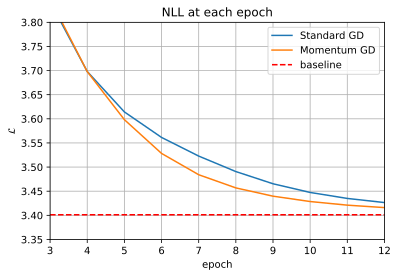

In [94]:
plt.plot(range(1,17),nlls)
plt.plot(range(1,17),savnlls)
#plt.plot(javnlls_2)
plt.axhline(np.log(len(dataset)),color = 'r', linestyle= 'dashed')
plt.title('NLL at each epoch')
plt.legend(['Standard GD','Momentum GD','baseline'])
plt.xlabel('epoch')
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(range(1,17,1))
plt.xlim(3,12)
plt.ylim(3.35,3.8)
plt.grid(True)
plt.show()

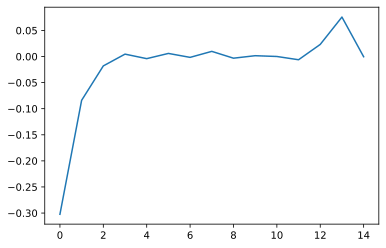

In [95]:
plt.plot(out_lr.past_grad)

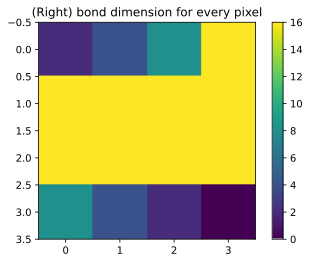

In [96]:
bdims_imshow(bars_mps,(4,4))

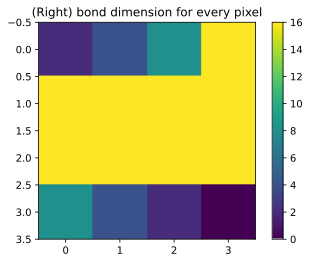

In [97]:
bdims_imshow(bars_mps_sav,(4,4))

In [ ]:
samples = generate_samples(bars_mps,100)

In [ ]:
for _ in range(100):
    plot_img(samples[_],(4,4),savefig = f'samples/bars_sample{_}')